In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [2]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
underground_2021=121
#Length of undergeound lines in miles in base year
overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line 

In [3]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [4]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


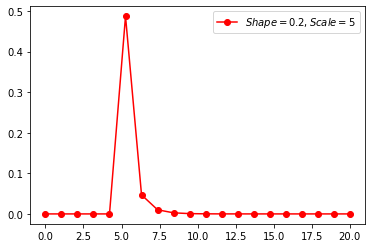

In [5]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [6]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [7]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


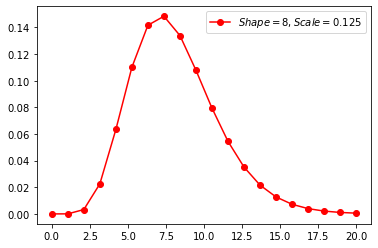

In [8]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

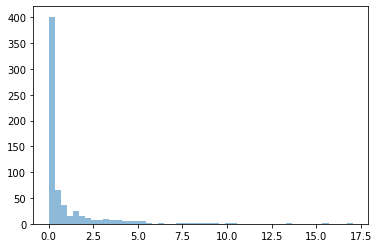

[1.75847779e-01 5.26781949e+00 1.76639809e-01 3.44844294e+00
 3.40155275e-02 5.86089061e-04 1.97406870e-03 1.00640487e-05
 3.66784989e-04 8.81037950e-02 9.93825309e-01 1.32273092e-01
 5.83307036e-01 2.86065505e+00 1.07317956e-02 9.35430495e-02
 6.34495729e-01 1.12403078e-02 1.86629294e-02 5.95617705e-01
 3.90000376e+00 2.31644442e+00 1.49734957e+01 9.69062920e-01
 1.79056494e-02 3.71016469e-02 2.07468737e-01 8.74347181e-02
 1.04478896e-02 4.55999675e-01 3.64946945e-03 3.91323154e-06
 3.89604319e-01 1.66519215e-01 1.12011643e+00 1.05758819e-01
 4.00475298e-02 3.30204471e-03 1.29615941e-05 2.54461437e-01
 1.02737474e+01 5.29320461e-08 1.49630437e-01 1.64261737e-01
 2.62114021e-02 2.63600385e+00 2.42031294e-03 7.41574544e-01
 2.16885325e+00 3.76957841e-03 9.40278838e-01 1.04604383e+00
 8.75411955e-02 1.71227905e+00 4.98399909e-05 5.67722781e-06
 7.40976739e-02 1.51748365e-01 1.81679192e-04 3.22977694e-01
 6.92232116e-02 1.15729068e-03 1.05877704e-07 1.59906395e-05
 8.34409165e-02 2.468497

In [9]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year (2021)

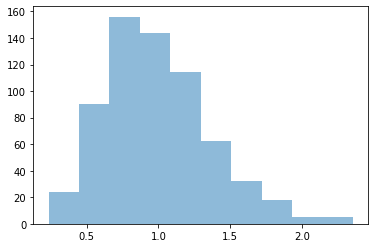

In [11]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [903]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [14]:
random.uniform(0,1)

0.36112189857767074

In [12]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0.1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        
###Lifecycle Infrastructure Costs:
#     def whether_over_or_under(self):
#         #random.seed(1)
#         self.over_or_under=random.randint(0,1)
#         return (self.over_or_under)
#     # Randomly determining status of overhead or underground of circuit
#     def get_random_age_2021(self):
#         #random.seed(1)
#         self.age= np.random.gamma(shape_age_x, scale_age_x)
#         return (self.age)
#     # Randomly determining circuit's ages in the base year (2021)
#     def get_random_length_2021(self):
#         #random.seed(1)
#         self.length= np.random.gamma(shape_length_x,scale_length_x)
#         return (self.length)
    # Randomly determining circuit's ages in the base year (2021)
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    def age_circuit_i_t(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            None
        age_i_2021=self.get_random_age_2021()
        if age_i_2021<=lifespan_x:
            age_i_t= (age_i_2021)+(t-2021)
        elif age_i_2021-lifespan_x==1:
            age_i_t=1
        elif age_i_2021-lifespan_x>1:
            age_i_t=(age_i_t)+1
        return(age_i_t)
    
    # Determining circuit's ages in year t
    def replcost_x_t(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        else:
            lifespan_x=0
            replecost_x=0
            replcost_growth_rate_x=0
        for t in range (2021,underground_line['lifespan']):
            if t==2021:
                replcost_x_t= replecost_x
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-2021)*(replecost_x)
            return (replcost_x_t)
    #Determining replacement cost line x in time t
    def capex_StatusQuo_i(self):
        replcost_x_t=self.replcost_x_t()
        age_i_t=self.age_circuit_i_t()
        capex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)^(t-2021))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
            else:
                 capex_StatusQuo_i=0
            return (capex_StatusQuo_i)
    #Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def opex_x_t (self):
        over_or_under= self.whether_over_or_under()
        age_i_t=self.age_circuit_i_t()
        replcost_x_t=self.replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_x=0
        for t in range (2021,underground_line['lifespan']):
            opex_x_t=0
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
            else:
                None
            return (opex_x_t)
    #Annual operation and maintenance expenses for each line
    def opex_StatusQuo_i (self):
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        opex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.capex_StatusQuo_i()
            opex_StatusQuo_i=self.opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def first_retire_i(self):
        age_2021_i=self.get_random_age_2021()
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_2021_i)+2021
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def capex_underground_i(self):
        over_or_under= self.whether_over_or_under()
        if over_or_under==0:
            over_or_under=1
        length_i=self.get_random_length_2021()
        capex_underground_i=0
        rplcost_x_t=self.replcost_x_t()
        for t in range (2021,underground_line['lifespan']):
            capex_i=((rplcost_x_t)(length_i))/((1+r)^(t-2021))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def opex_underground_i (self):
        over_or_under= self.whether_over_or_under()
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        first_retire_i=self.first_retire_i()
        opex_underground_i=0
        for t in range (2021,underground_line['lifespan']):
            if  over_or_under==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    over_or_under==1
                    opex_x_t=self.opex_x_t()
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.capex_underground_i()
            opex_underground_i=self.opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.first_retire_i()
        length_i=self.get_random_length_2021()
        for t in range (2021,underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_2021+sumlength
            else:
                underground_t=underground_2021
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (2021,underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_2021()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [15]:
for i in range (number_circuit):
    circuit_i=Circuit()
    circuit_over_or_under=circuit_i.whether_over_or_under()
    #print(circuit_over_or_under)
    circuit_age_2021=circuit_i.get_random_age_2021()
    #print (circuit_age_2021)
    for t in range (2021,underground_line['lifespan']):
        circuit_age_i_t_list=[]
        age_i_t=circuit_i.age_circuit_i_t()
        circuit_age_i_t_list=circuit_age_i_t_list.append(age_i_t)
        #print(circuit_age_i_t_list)
    print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

NameError: name 'circuit_age_i_t_list' is not defined

In [916]:
for i in range (number_circuit):
    circuit_i=Circuit()
    replcost_x_t_i=circuit_i.replcost_x_t()
    print(replcost_x_t_i)
    capex_StatusQuo_i=circuit_i.capex_StatusQuo_i()
    print(capex_StatusQuo_i)
    opex_x_t=circuit_i.opex_x_t()
    print(opex_x_t)
    opex_StatusQuo_i=circuit_i.opex_StatusQuo_i()
    print(opex_StatusQuo_i)
    lifecyclecost_StatusQuo=circuit_i.lifecyclecost_StatusQuo()
    print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

None
None
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [917]:
for i in range (number_circuit):
    circuit_i=Circuit()
    first_retire_i=circuit_i.first_retire_i()
    print(first_retire_i)
    capex_underground_i=circuit_i.capex_underground_i()
    print(capex_underground_i)
    opex_underground_i=circuit_i.opex_underground_i()
    print(opex_underground_i)
    lifecyclecost_underground=circuit_i.lifecyclecost_underground()
    print(ifecyclecost_underground)
    underground_t=circuit_i.underground_t()
    print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2065.990949516553
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'